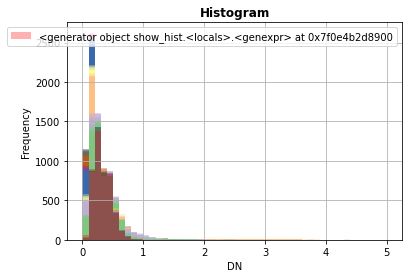

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


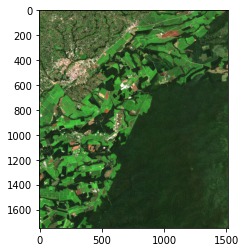

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show

# Load the raster image
dataset = rasterio.open('/home/sepal-user/20230626_pyeo_installation/pyeo_1/models/my_model/composite_T36MYE_20230220T074941_clipped.tif')


def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

b2 = norm(dataset.read(1).astype(float))
b3 = norm(dataset.read(2).astype(float))
b4 = norm(dataset.read(3).astype(float))

b2 = b2 * 5
b2_locs = np.where(b2==1.0)
b2[b2_locs] = 1.0

b3 = b3 * 5
b3_locs = np.where(b3==1.0)
b3[b3_locs] = 1.0

b4 = b4 * 5
b4_locs = np.where(b4==1.0)
b4[b4_locs] = 1.0

# Create RGB
rgb = np.dstack((b4,b3,b2))


show_hist(rgb, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

# Visualize RGB
plt.imshow(rgb)

# show(src, vmin=0, vmax=1000)
# # Read the raster data
# data = src.read(1)

# # Define your custom colormap
# colors = ['#006400', '#A0D032', '#844513']

# # Create a discrete colormap
# cmap = matplotlib.colors.ListedColormap(colors)

# # Set the number of classes
# num_classes = 13

# # Display the image using the custom colormap
# show(data, cmap=cmap)

# # Plot the distribution of classes
# class_labels, class_counts = np.unique(data, return_counts=True)

# plt.figure(figsize=(24, 12))
# plt.bar(class_labels, class_counts)
# # plt.xlabel('Class')
# # plt.ylabel('Count')
# # plt.title('Class Distribution')
# # plt.show(figsize=(12,6))

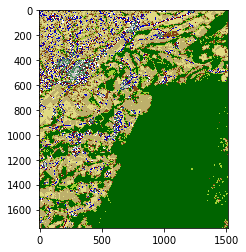

<BarContainer object of 6 artists>

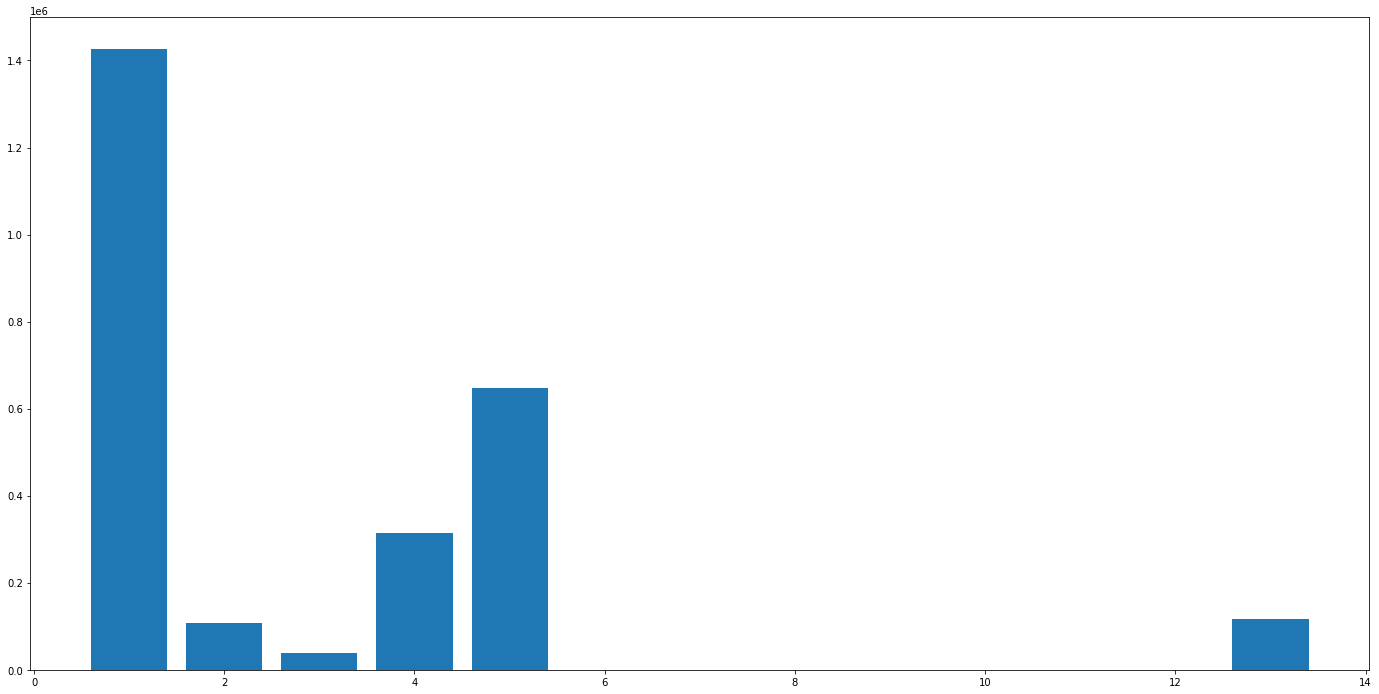

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show

# Load the raster image
src = rasterio.open('/home/sepal-user/20230626_pyeo_installation/pyeo_1/models/my_model/composite_T36MYE_20230220T074941_clipped_full_class.tif')

# Read the raster data
data = src.read(1)

# Define your custom colormap
colors = ['#006400', '#A0D032', '#844513', '#BDB06B', '#E0DA82', '#0000CD', '#800000',
          '#FFFFFF', '#3C3C3C', '#808080', '#2E8B57', '#5C915C', '#C8C8C8']

# Create a discrete colormap
cmap = matplotlib.colors.ListedColormap(colors)

# Set the number of classes
num_classes = 13

# Display the image using the custom colormap
show(data, cmap=cmap)

# Plot the distribution of classes
class_labels, class_counts = np.unique(data, return_counts=True)

plt.figure(figsize=(24, 12))
plt.bar(class_labels, class_counts)
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Class Distribution')
# plt.show(figsize=(12,6))